Generación 0 - Distancia óptima: 47570.63847458849
Generación 1000 - Distancia óptima: 18225.598973791926
Generación 2000 - Distancia óptima: 17042.38346580768
Generación 3000 - Distancia óptima: 15783.465496651861
Generación 4000 - Distancia óptima: 14899.750113301698
Generación 5000 - Distancia óptima: 14433.869579142824
Generación 6000 - Distancia óptima: 14150.139918485995
Generación 7000 - Distancia óptima: 14133.990602213238
Generación 8000 - Distancia óptima: 13881.010753480514
Generación 9000 - Distancia óptima: 13735.039914496552
Generación 10000 - Distancia óptima: 13672.711082650017
Generación 11000 - Distancia óptima: 13672.711082650017
Generación 12000 - Distancia óptima: 13661.389551153905
Generación 13000 - Distancia óptima: 13589.084955154627
Generación 14000 - Distancia óptima: 13472.809585027171
Generación 15000 - Distancia óptima: 13431.782864990448
Generación 16000 - Distancia óptima: 13110.094738832344
Generación 17000 - Distancia óptima: 12985.323817794302
Generac

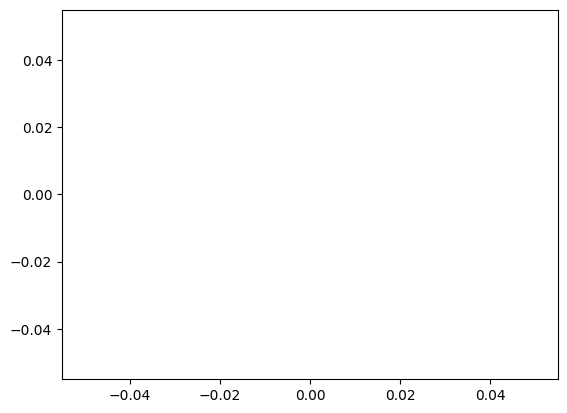

Tour óptimo encontrado: [43, 70, 44, 127, 67, 118, 90, 105, 12, 73, 122, 30, 26, 128, 143, 146, 48, 40, 100, 115, 56, 116, 38, 139, 16, 65, 59, 129, 147, 10, 126, 68, 60, 35, 117, 52, 46, 19, 138, 119, 36, 5, 8, 27, 41, 39, 23, 11, 42, 108, 50, 137, 53, 91, 45, 89, 82, 55, 25, 145, 96, 123, 7, 88, 83, 6, 29, 33, 47, 62, 112, 9, 95, 34, 92, 125, 32, 110, 104, 51, 132, 14, 77, 78, 58, 15, 120, 93, 87, 20, 149, 114, 3, 103, 21, 124, 148, 61, 2, 72, 75, 86, 0, 97, 102, 94, 81, 106, 4, 99, 142, 141, 17, 74, 64, 84, 131, 54, 57, 49, 134, 136, 101, 98, 113, 18, 1, 107, 28, 69, 85, 80, 109, 140, 24, 133, 130, 31, 66, 37, 22, 76, 121, 13, 79, 71, 144, 135, 111, 63]
Distancia total: 8191.56775915082


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
import math
from scipy.spatial import distance_matrix

# Configuración de parámetros
POPULATION_SIZE = 150
GENERATIONS = 200000
MUTATION_RATE = 0.4
ELITE_SIZE = 5

# Cargar datos desde el archivo .txt
def load_tsp_data(file_path):
    coords = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
        start_index = lines.index('NODE_COORD_SECTION\n') + 1
        for line in lines[start_index:]:
            if line.strip() == 'EOF':
                break
            _, x, y = line.split()
            coords.append((float(x), float(y)))
    return np.array(coords)

# Generar una ruta aleatoria
def create_route(cities):
    return random.sample(list(cities), len(cities))

# Calcular la distancia de la ruta
def route_distance(route, dist_matrix):
    return sum(dist_matrix[route[i], route[i + 1]] for i in range(len(route) - 1)) + dist_matrix[route[-1], route[0]]

# Crear la población inicial
def create_population(pop_size, cities):
    return [create_route(cities) for _ in range(pop_size)]

# Selección de los mejores individuos
def rank_routes(population, dist_matrix):
    fitness_results = {i: route_distance(ind, dist_matrix) for i, ind in enumerate(population)}
    return sorted(fitness_results.items(), key=lambda x: x[1])

# Selección por torneo
def selection(ranked_population):
    selected = []
    for i in range(ELITE_SIZE):
        selected.append(ranked_population[i][0])
    for i in range(len(ranked_population) - ELITE_SIZE):
        selected.append(random.choice(ranked_population[:POPULATION_SIZE // 2])[0])
    return selected

# Cruzar dos padres
def breed(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = parent1[start:end]
    child += [item for item in parent2 if item not in child]
    return child

# Aplicar mutación 2-Opt
def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        i, j = sorted(random.sample(range(len(individual)), 2))
        individual[i:j] = individual[i:j][::-1]  # Inversión de una sección
    return individual

# Crear la nueva generación
def evolve_population(population, dist_matrix):
    ranked_population = rank_routes(population, dist_matrix)
    selected_indices = selection(ranked_population)
    selected_population = [population[i] for i in selected_indices]
    children = [breed(selected_population[i], selected_population[-i-1]) for i in range(len(selected_population) - ELITE_SIZE)]
    mutated_population = [mutate(ind, MUTATION_RATE) for ind in children]
    return selected_population[:ELITE_SIZE] + mutated_population

# Generar la animación
def animate_solution(cities, history):
    fig, ax = plt.subplots()
    line, = ax.plot([], [], 'o-', lw=2)

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        x = [cities[city][0] for city in history[frame]]
        y = [cities[city][1] for city in history[frame]]
        line.set_data(x + [x[0]], y + [y[0]])
        return line,

    ani = FuncAnimation(fig, update, frames=len(history), init_func=init, blit=True, repeat=False)
    plt.show()
    ani.save('tsp_solution.gif', writer='imagemagick')

# Ejecutar el algoritmo
def genetic_algorithm_tsp(file_path):
    cities = load_tsp_data(file_path)
    dist_matrix = distance_matrix(cities, cities)
    population = create_population(POPULATION_SIZE, range(len(cities)))

    history = []
    for generation in range(GENERATIONS):
        population = evolve_population(population, dist_matrix)
        best_route_idx, best_distance = rank_routes(population, dist_matrix)[0]
        best_route = population[best_route_idx]

        # Guardar cada 1000 iteraciones para la animación
        if generation % 1000 == 0:
            history.append(best_route)

        if generation % 1000 == 0:
            print(f"Generación {generation} - Distancia óptima: {best_distance}")

    # Animar la solución
    animate_solution(cities, history)
    print("Tour óptimo encontrado:", best_route)
    print("Distancia total:", best_distance)

# Ruta al archivo .txt
file_path = 'ch150r.txt'
genetic_algorithm_tsp(file_path)
